In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from joblib import load

from helper import *

In [3]:
showings = load('../data/showings_extra_feature.joblib')
showings.replace(np.inf, 0, inplace=True)

# Coverage per hour per year

In [21]:
%%time
stats_prime = dict()
stats_early = dict()
for i in range(2001, 2021):
    stats_prime[i] = dict()
    stats_early[i] = dict()
    temp = showings.loc[showings.year == i]
    for j in range(24):
        if j == 23 or j < 9: continue
        elif j < 10:
            stats_early[i]['0' + str(j) + ':00-0' + str(j) + ':59'] = temp.loc[temp.hour == j, 'coverage']
        elif j < 12:
            stats_early[i][str(j) + ':00-' + str(j) + ':59'] = temp.loc[temp.hour == j, 'coverage']
        else:
            stats_prime[i][str(j) + ':00-' + str(j) + ':59'] = temp.loc[temp.hour == j, 'coverage']

Wall time: 978 ms


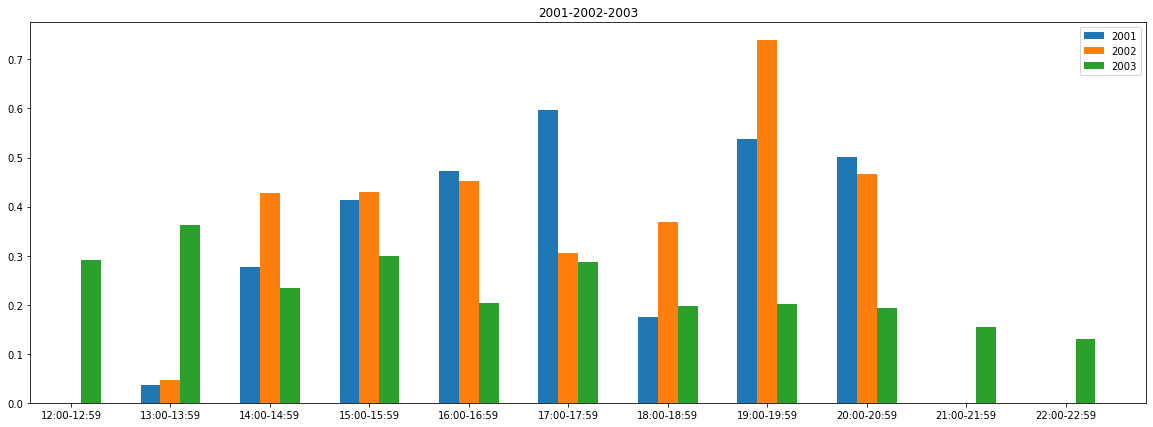

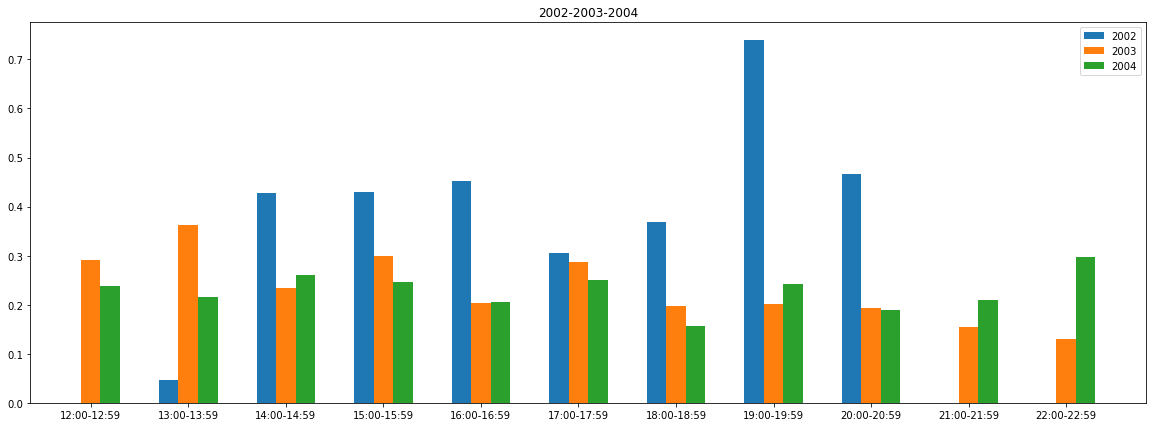

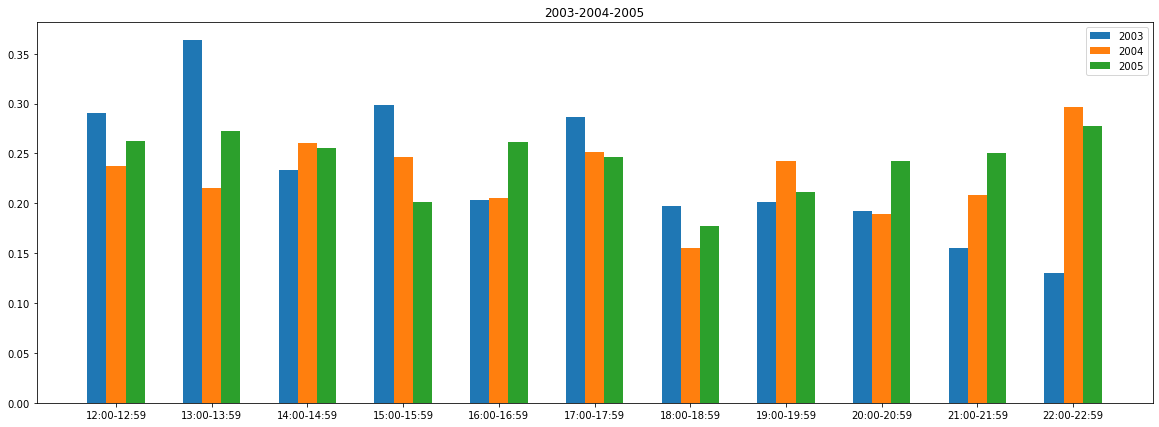

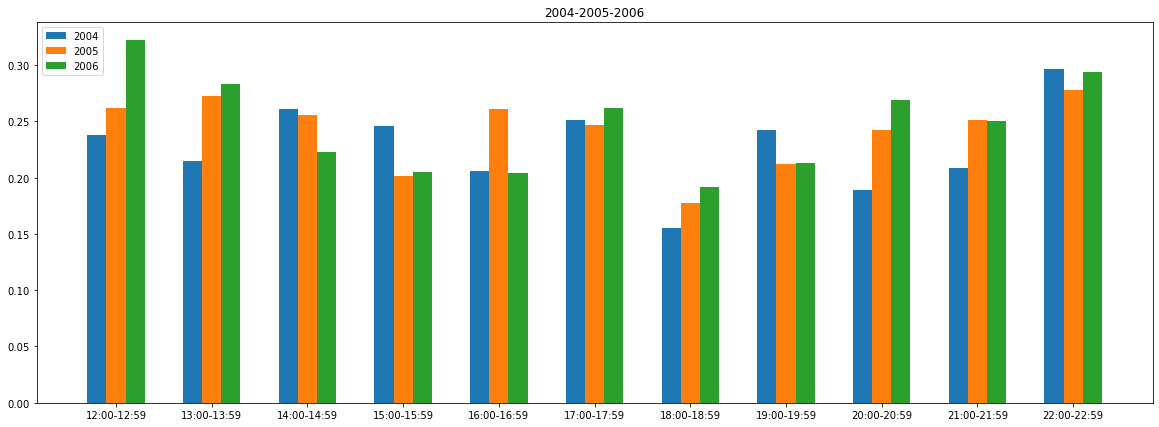

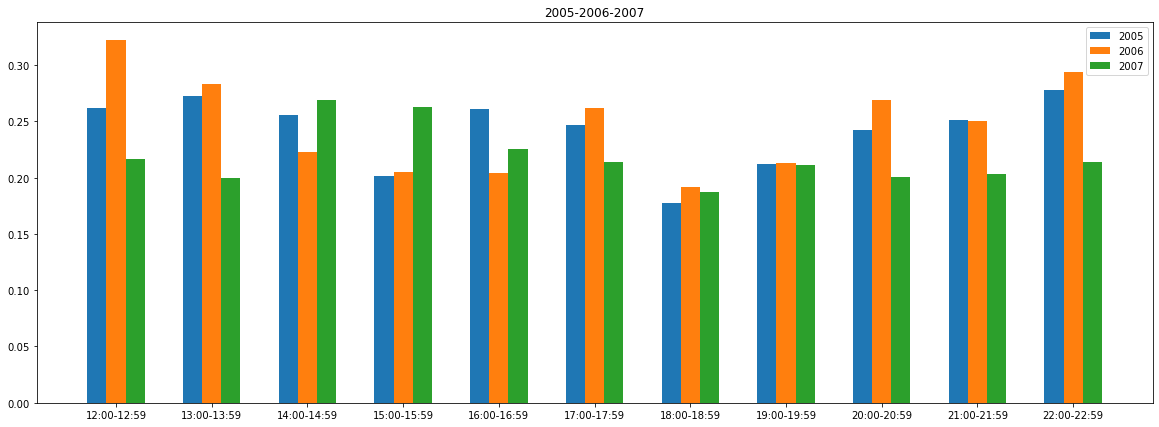

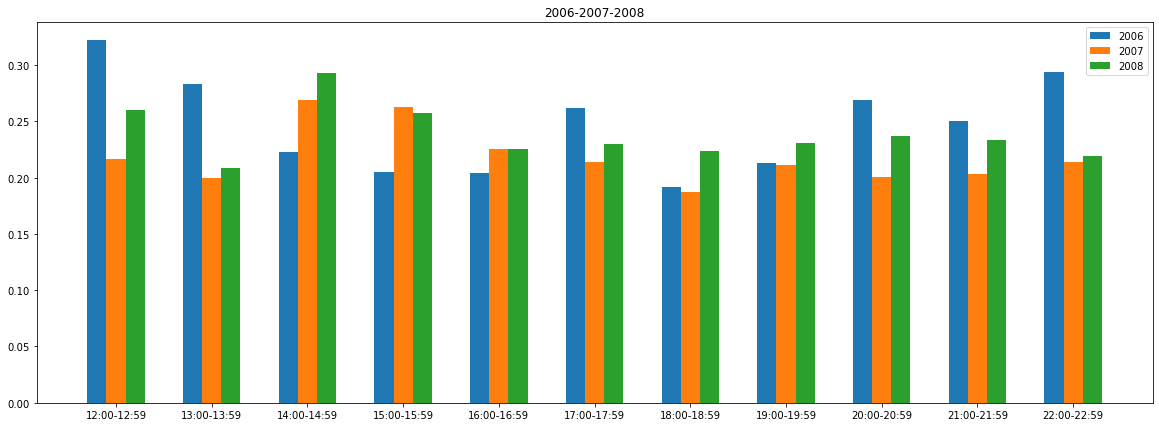

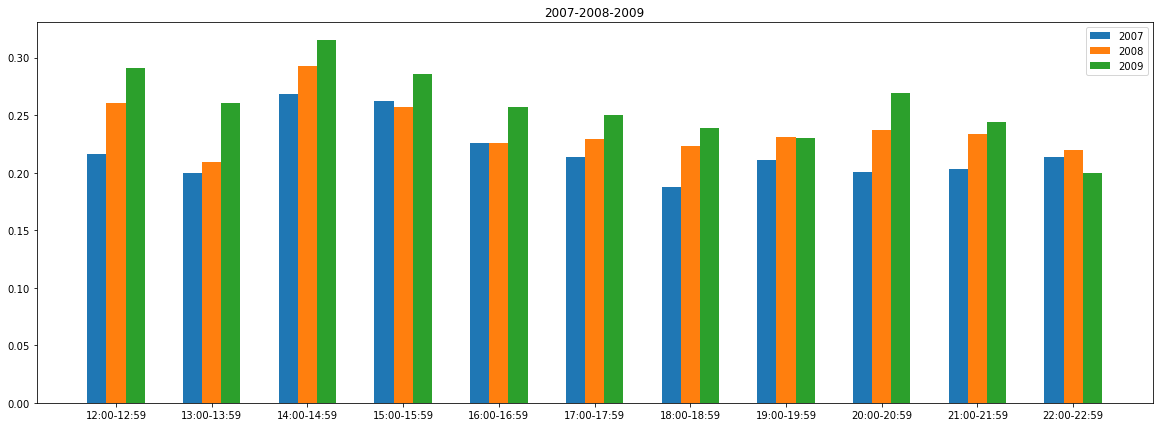

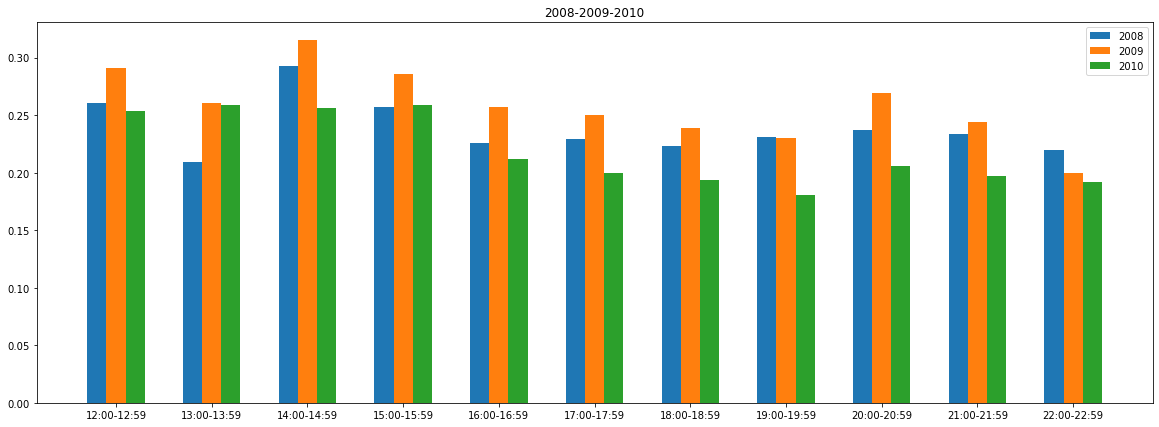

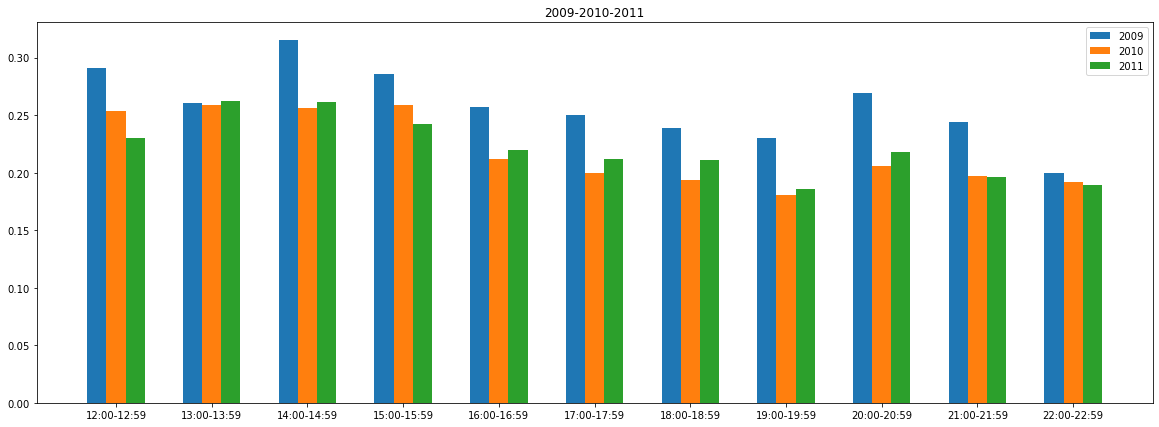

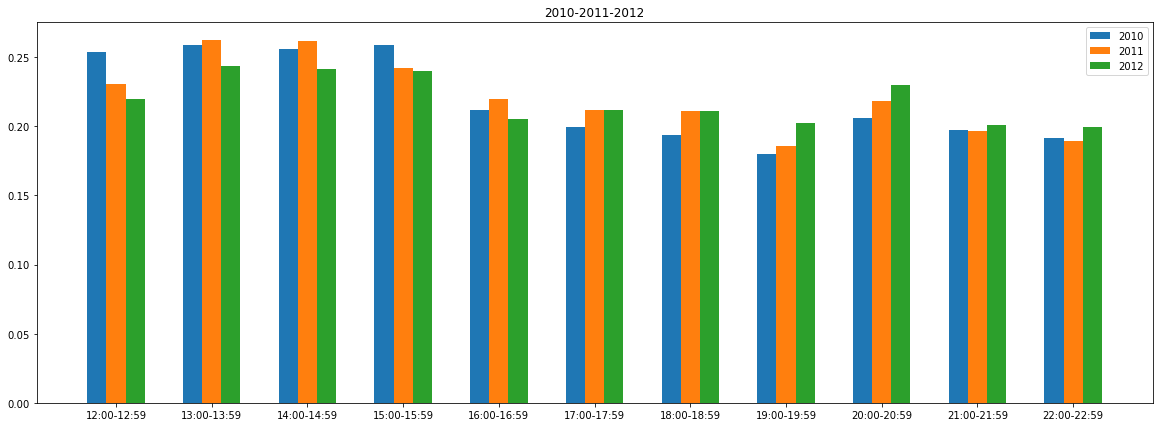

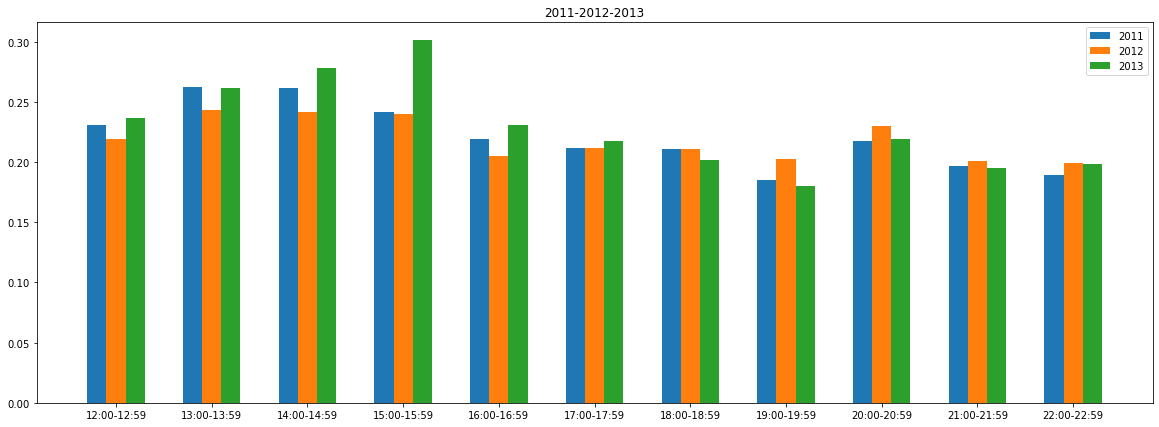

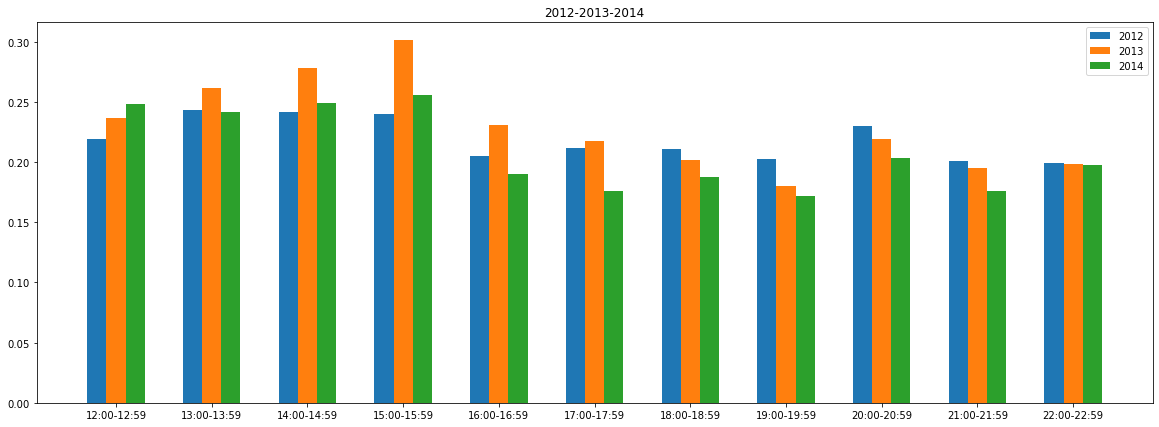

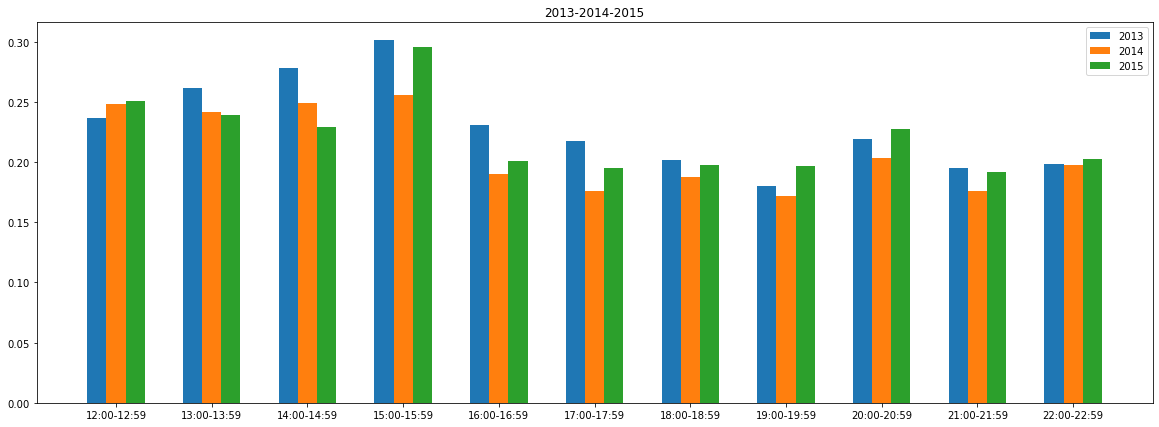

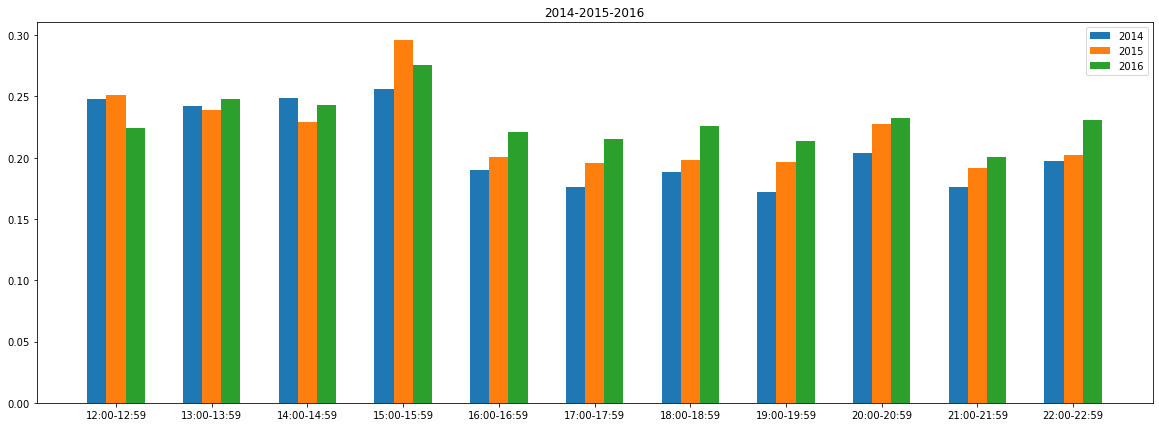

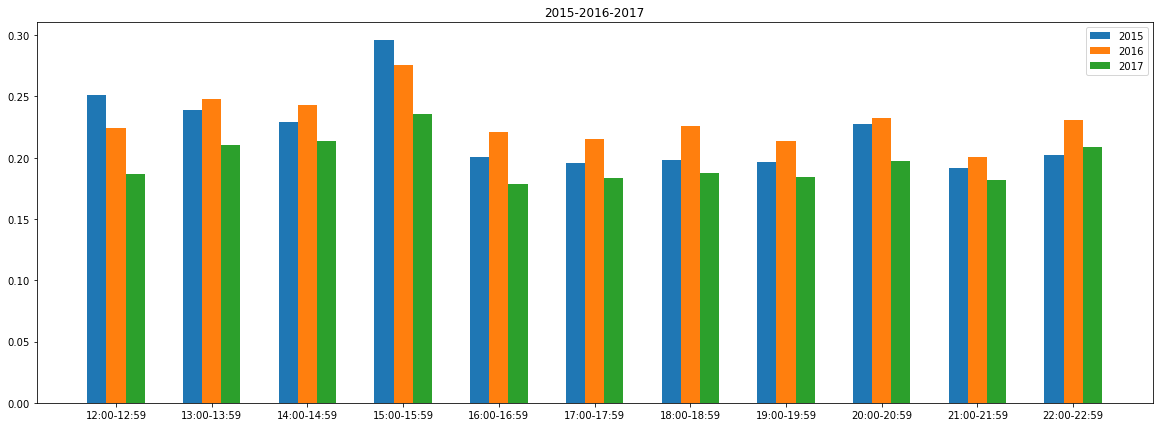

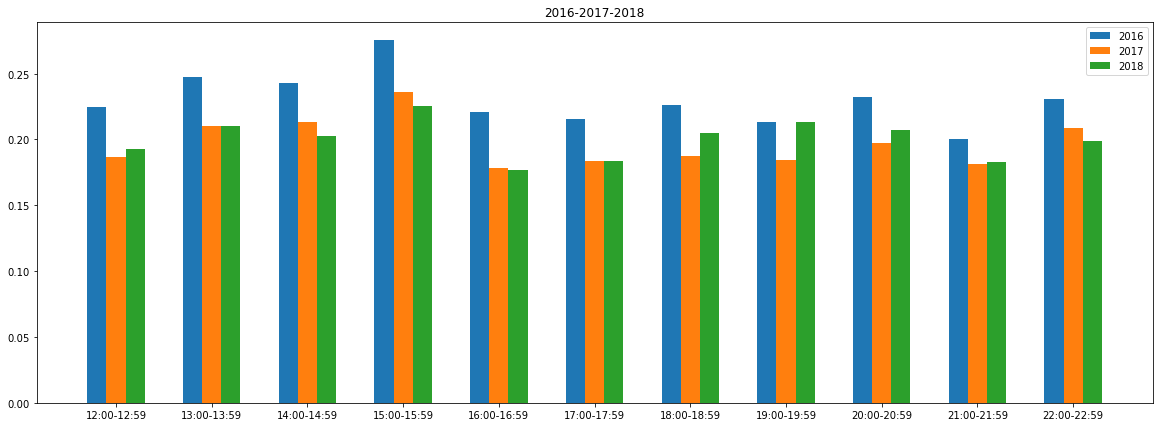

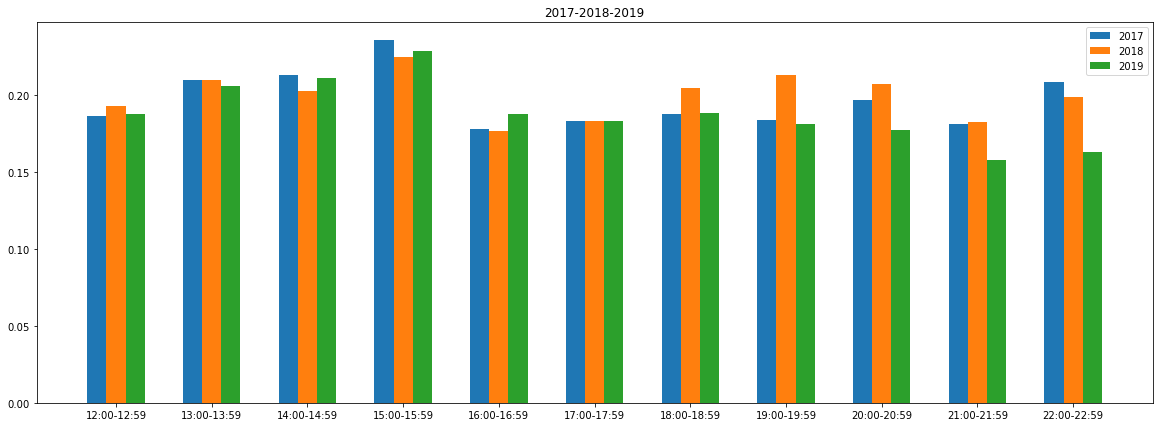

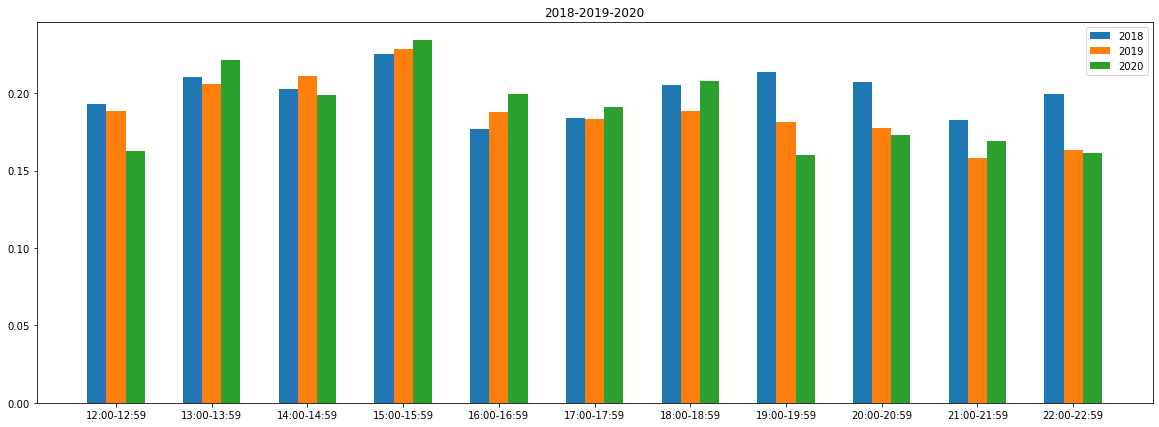

In [23]:
for i in stats_prime:
    if i+2 == 2021: break
    three_bar_plot(stats_prime[i], stats_prime[i+1], stats_prime[i+2], 
                   title =str(i)+'-'+str(i+1)+'-'+str(i+2), 
                   legend=(str(i), str(i+1), str(i+2)))

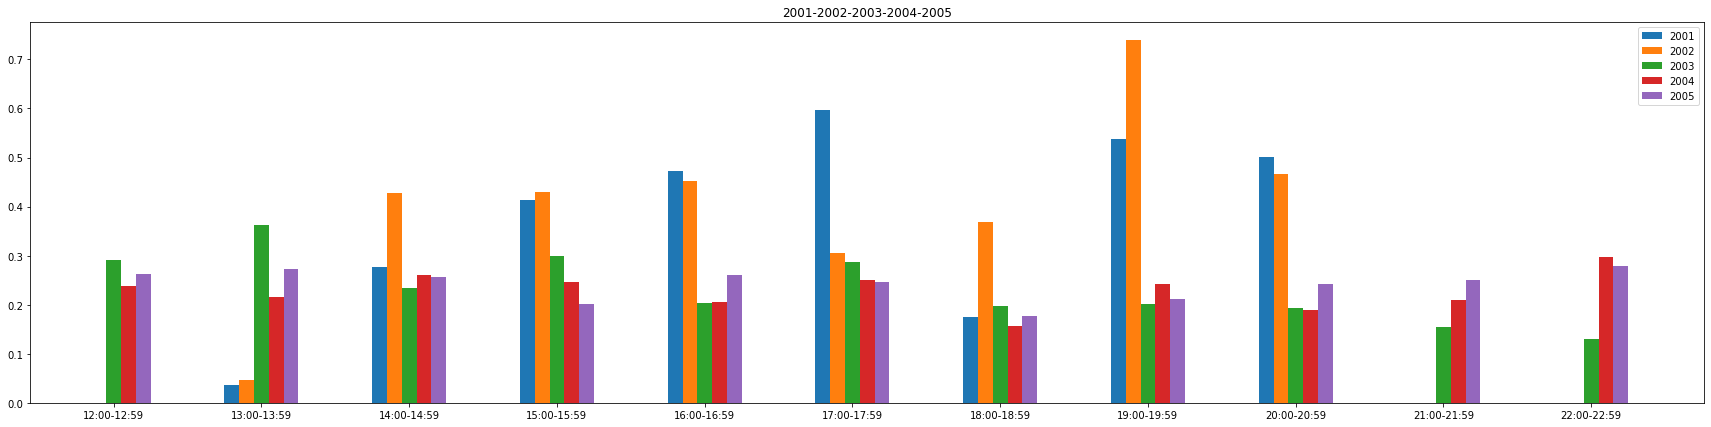

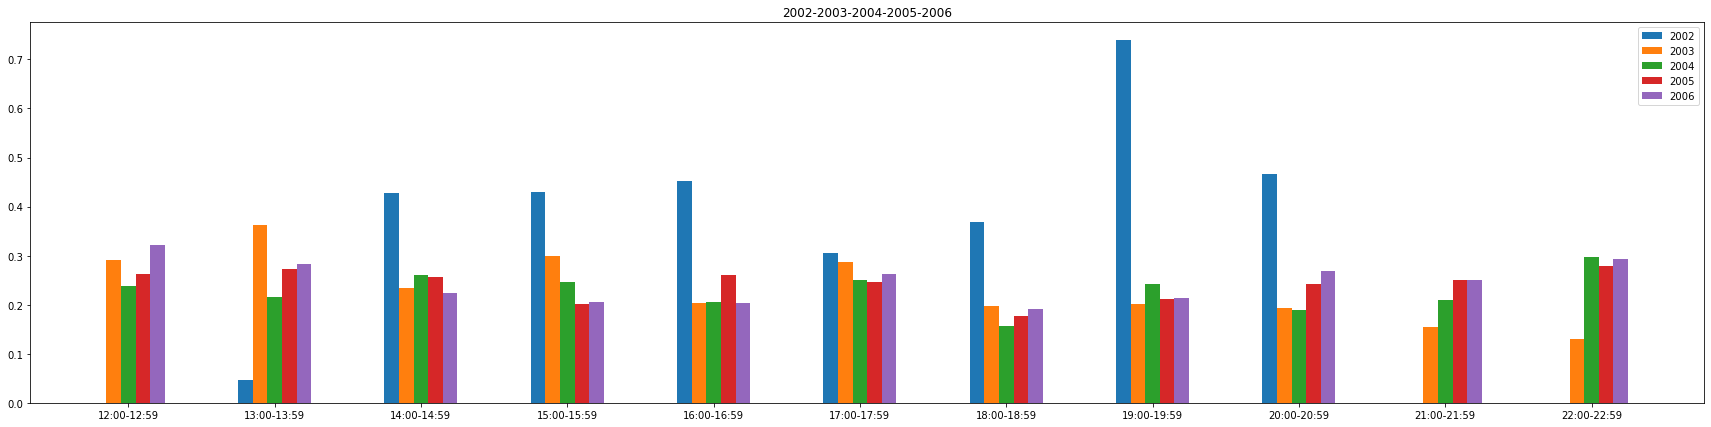

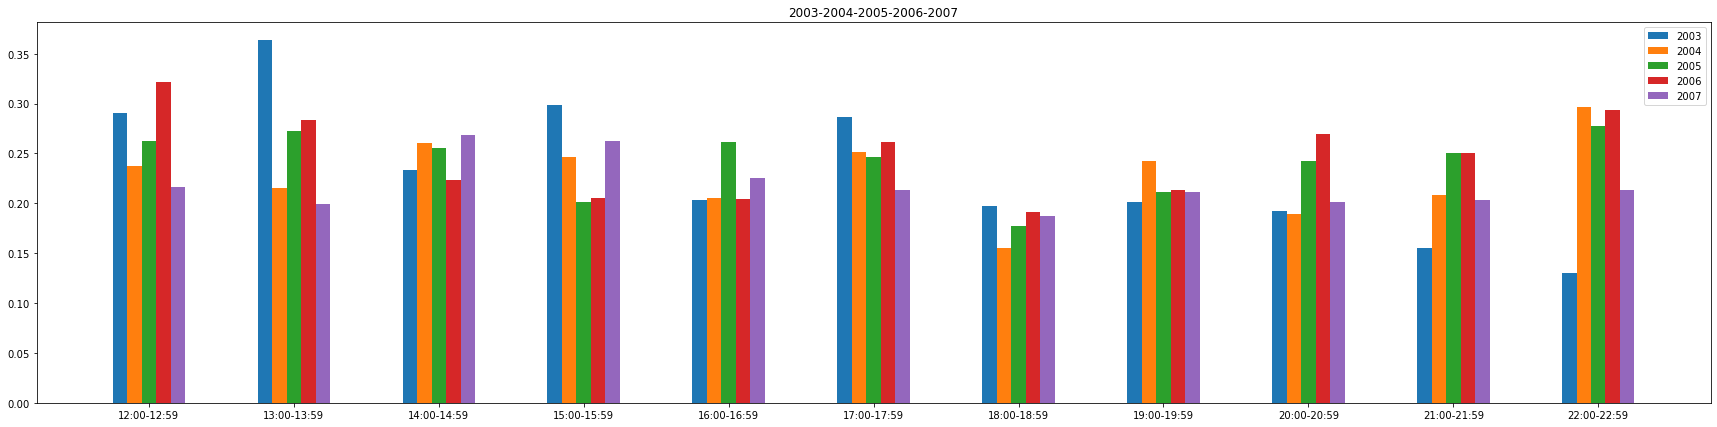

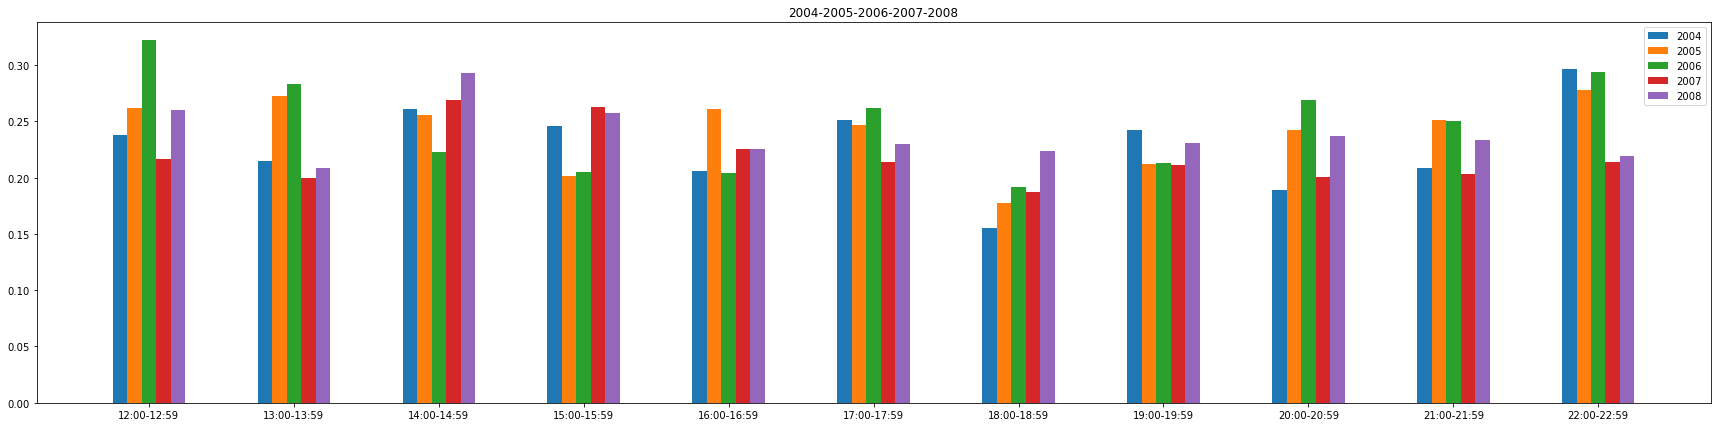

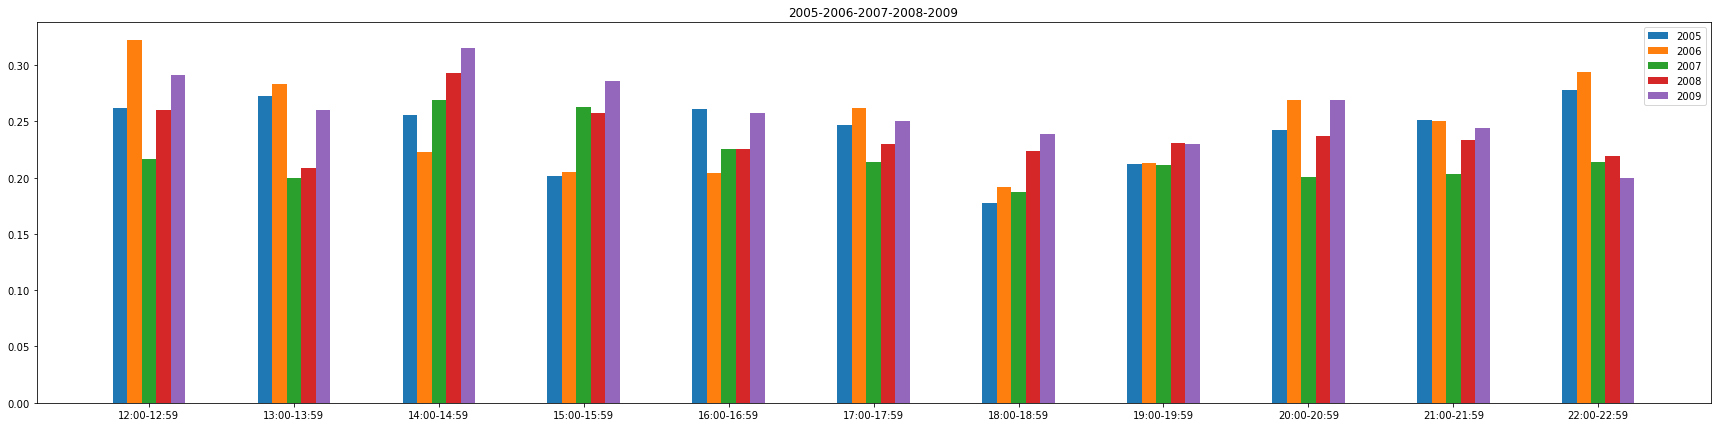

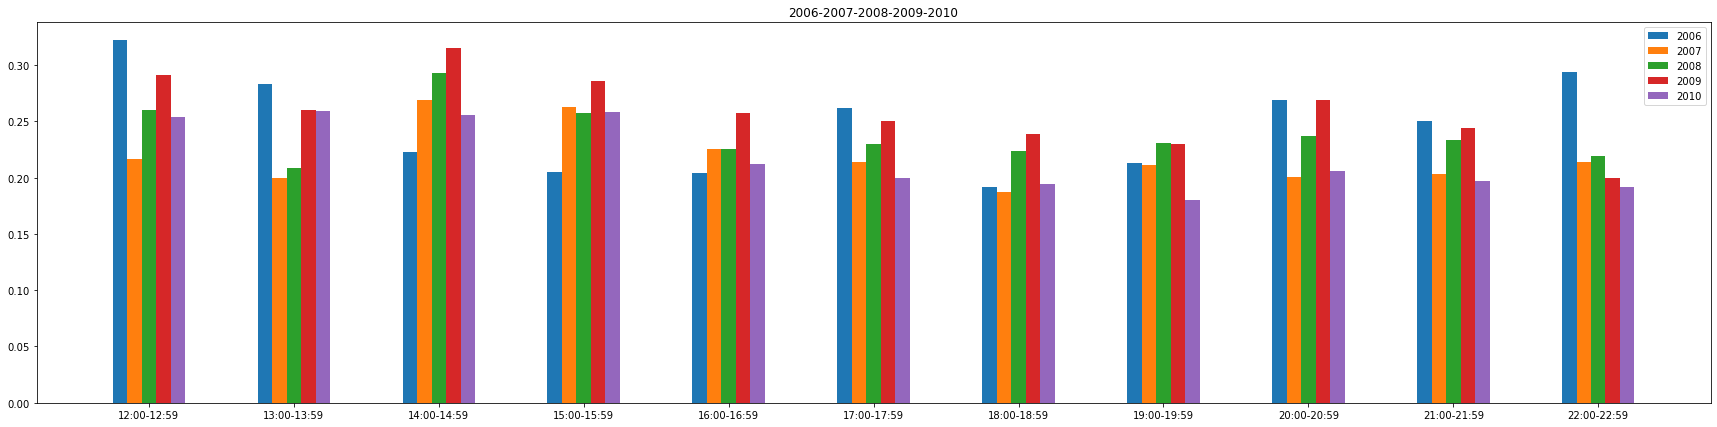

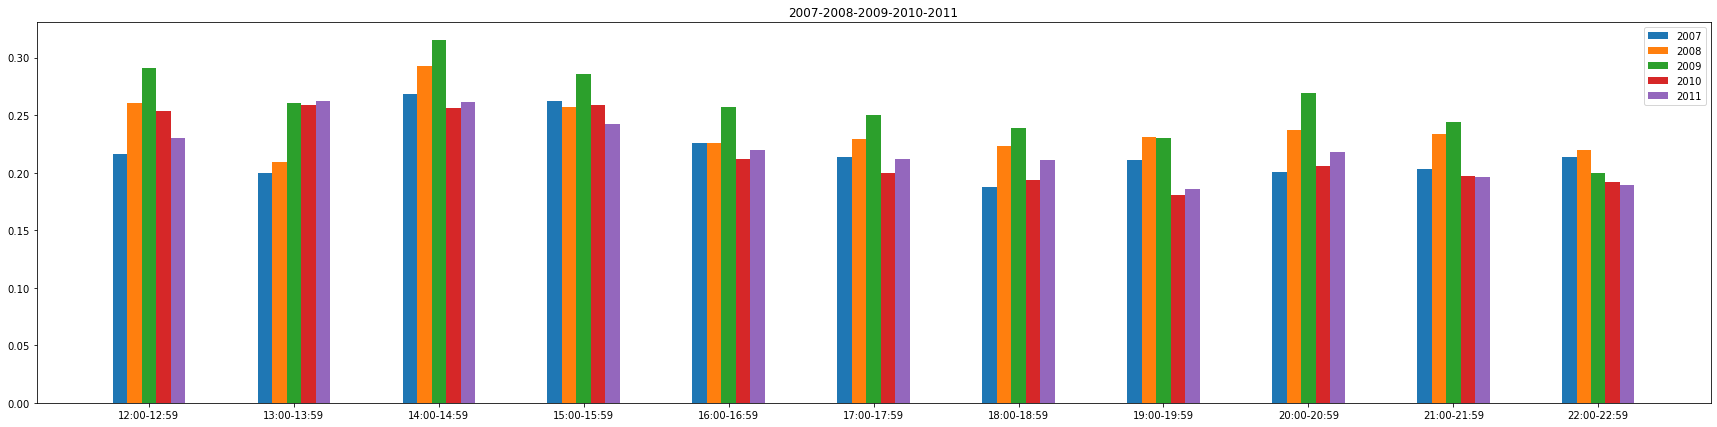

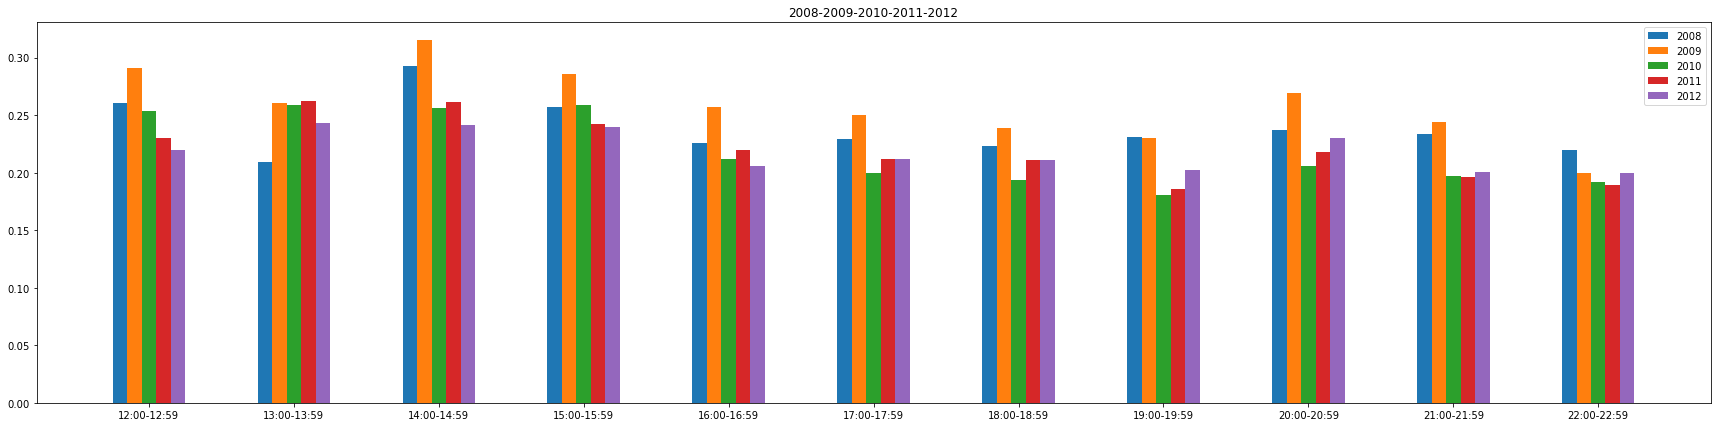

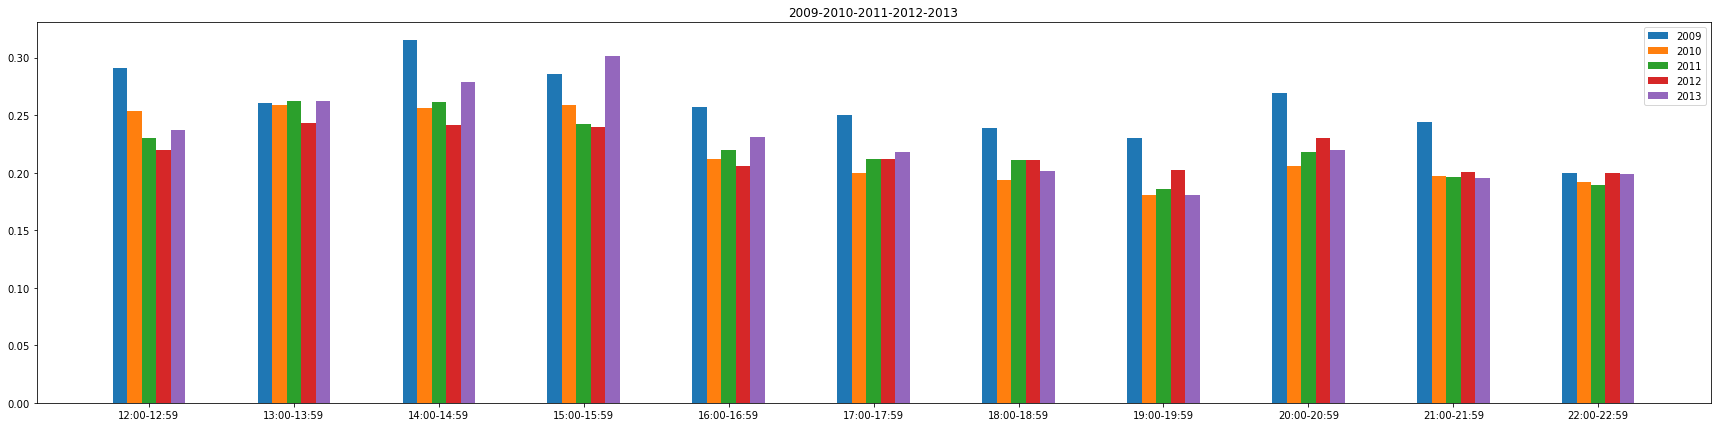

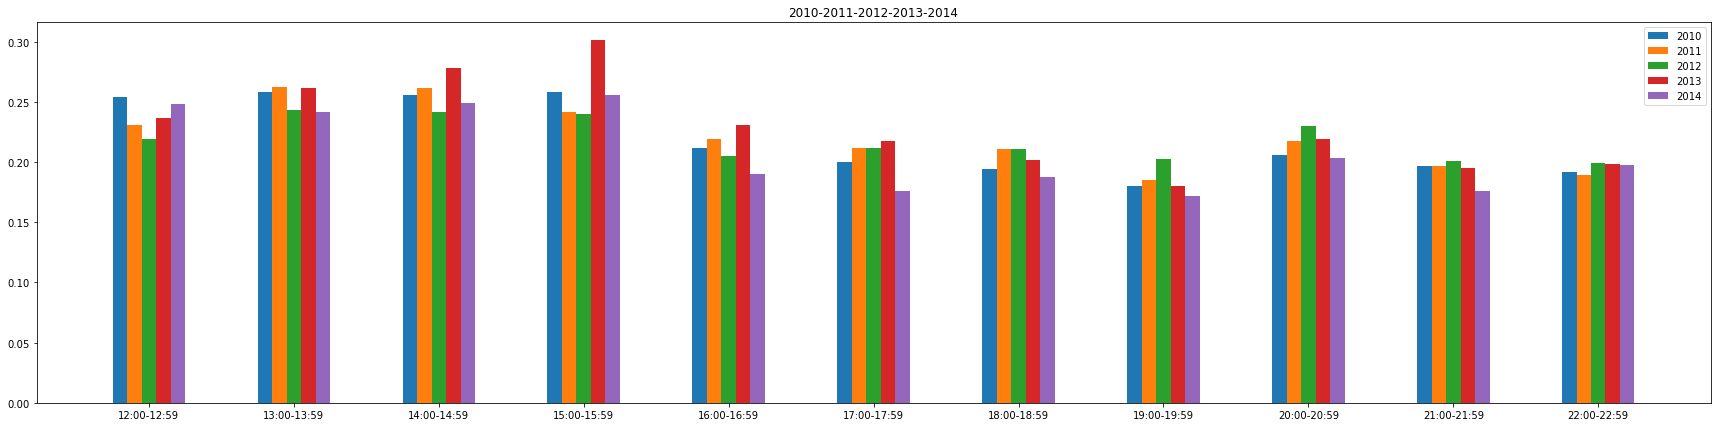

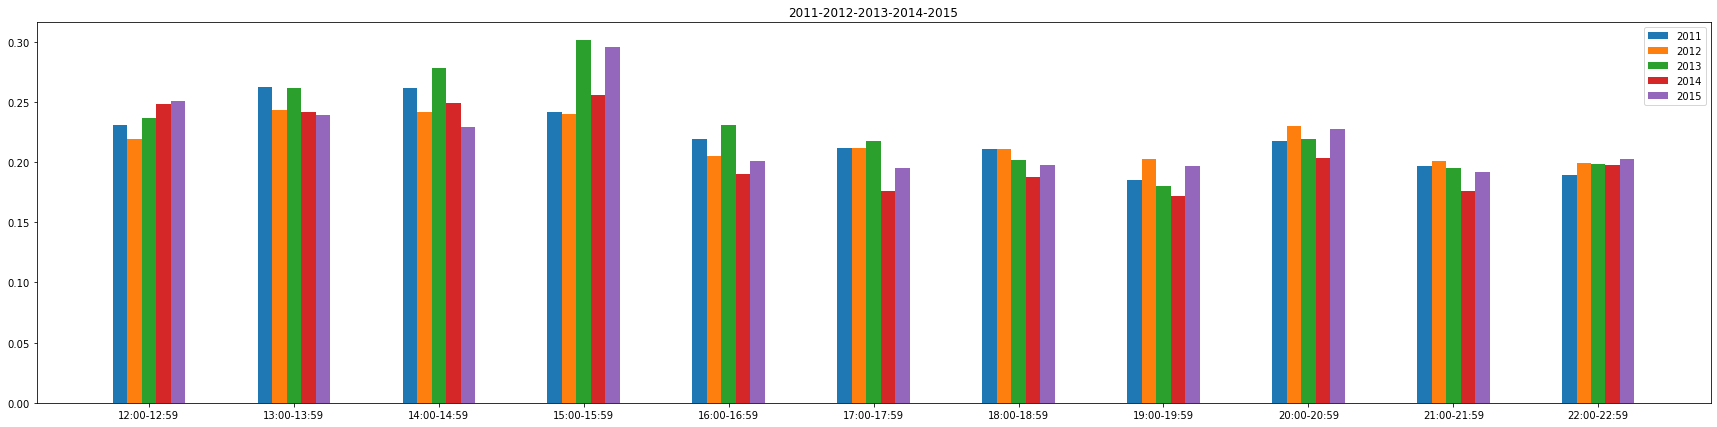

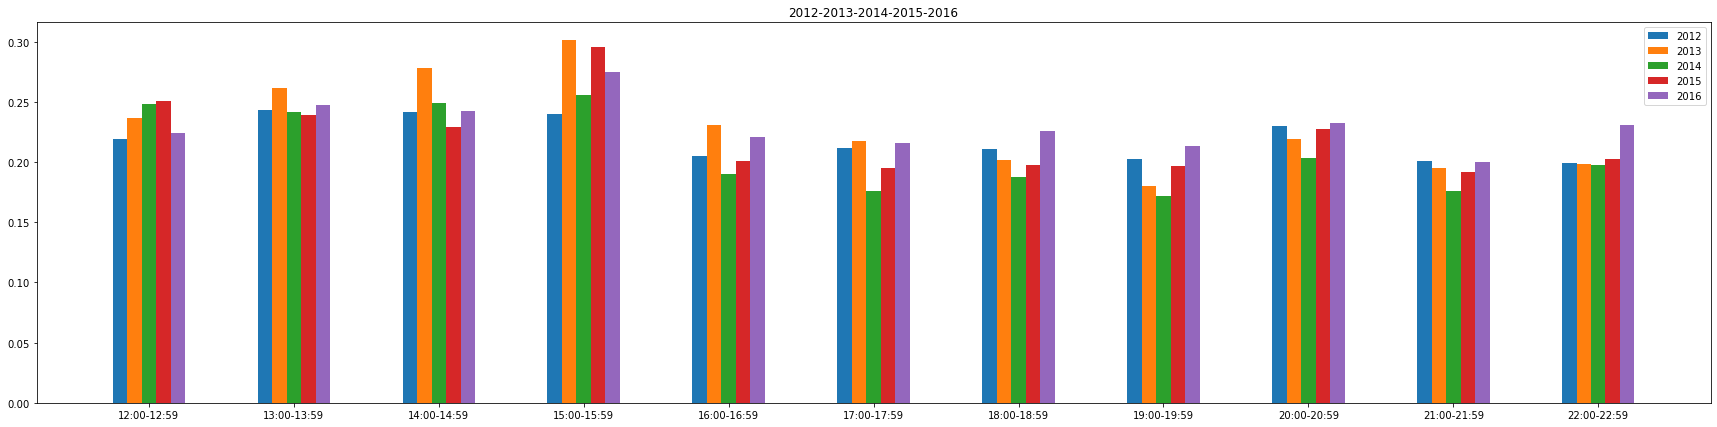

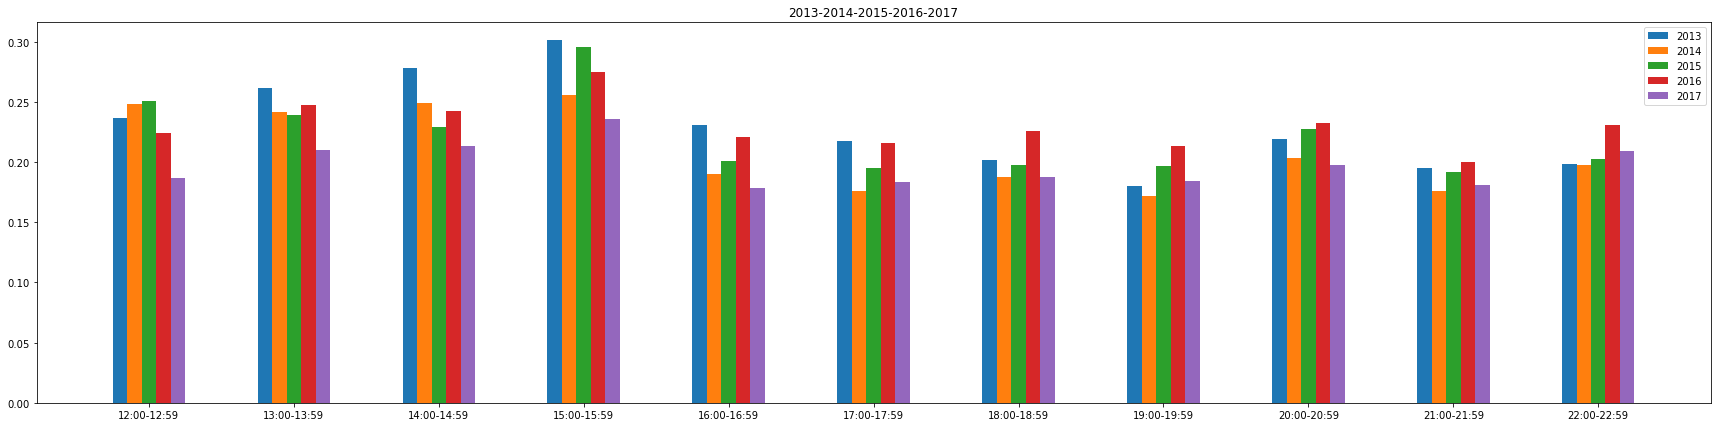

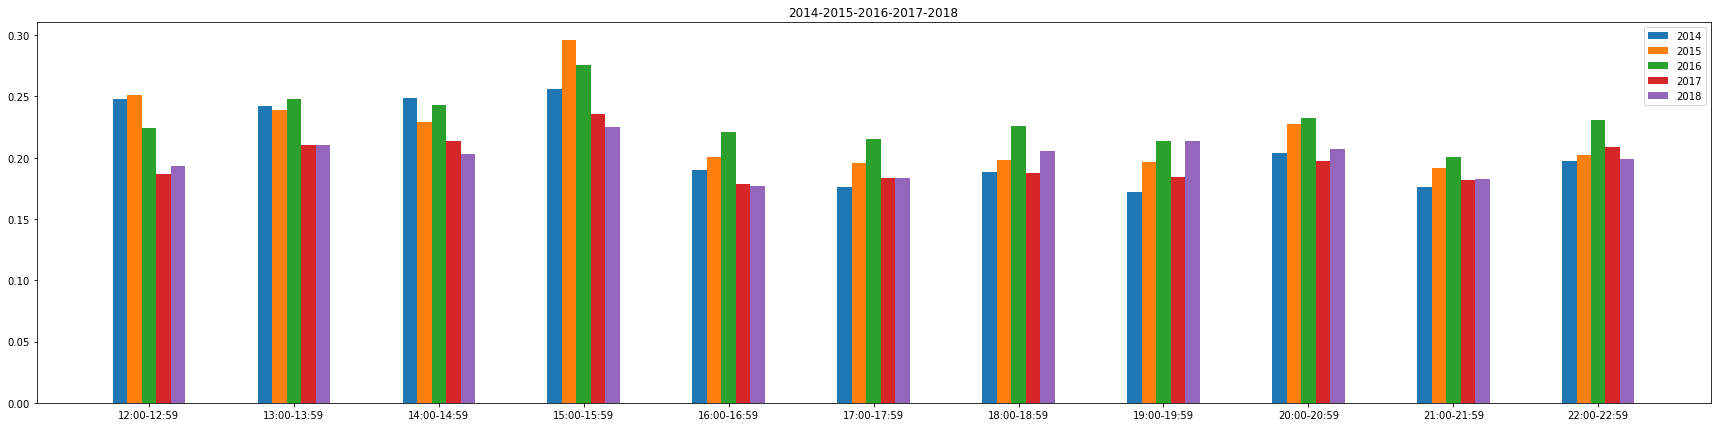

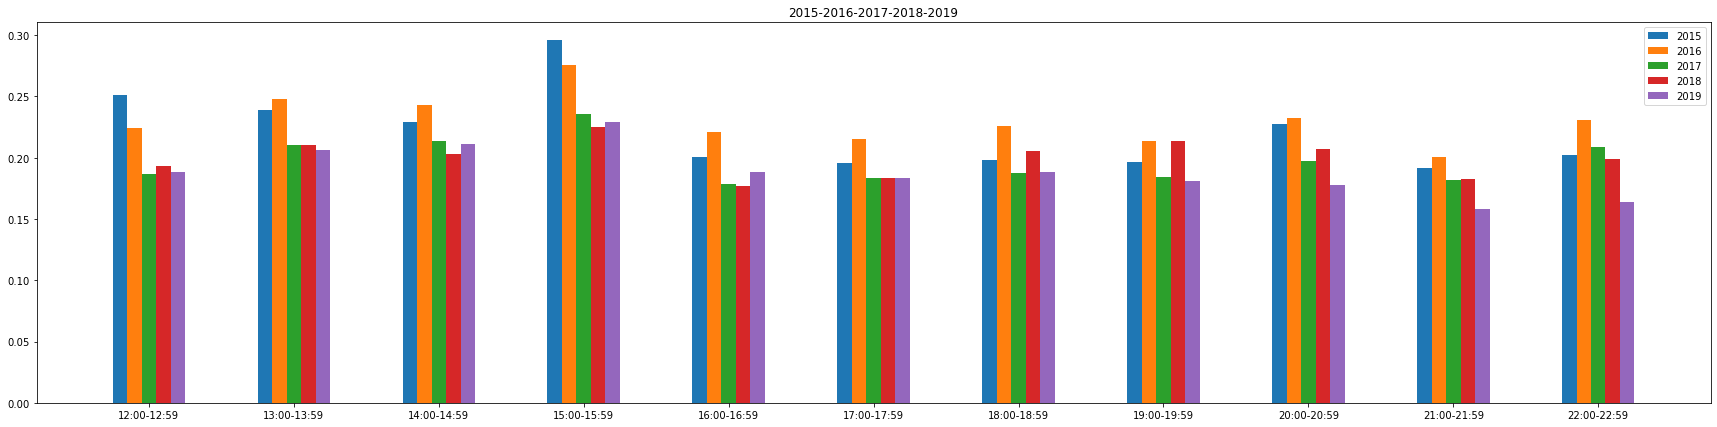

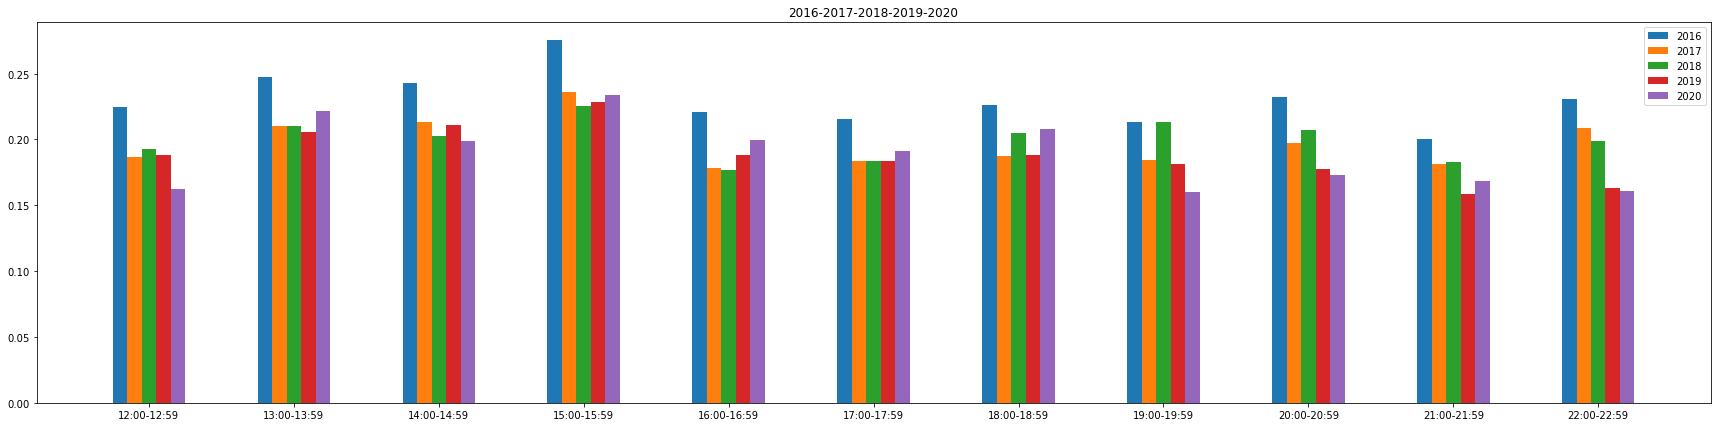

In [22]:
for i in stats_prime:
    if i+4 == 2021: break
    five_bar_plot(stats_prime[i], stats_prime[i+1], stats_prime[i+2], stats_prime[i+3], stats_prime[i+4], 
                   title =str(i)+'-'+str(i+1)+'-'+str(i+2)+'-'+str(i+3)+'-'+str(i+4), 
                   legend=(str(i), str(i+1), str(i+2), str(i+3), str(i+4)))